In [1]:
import deepxde as dde
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
dde.config.set_random_seed(1234)
dde.config.set_default_float("float64")

Set the default float type to float64


In [3]:
#computational domain
geom = dde.geometry.Rectangle([0, 0], [1, 1])

In [4]:
#pde
def pde(x, u):
    u_xx = dde.grad.hessian(u, x, i=0, j=0)
    u_yy = dde.grad.hessian(u, x, i=1, j=1)
    return u_xx + u_yy

## Hard Constraints

In [5]:
def output_transform2(x,u):
    return (1-x[:,0:1]) * (-x[:,1:2]**2 + x[:,1:2]) + x[:,0:1] * (-x[:,1:2]**2 + x[:,1:2]) + (1-x[:,1:2]) * (-x[:,0:1]**2 + x[:,0:1]) + x[:,1:2] * (-x[:,0:1]**2 + x[:,0:1]) + x[:,0:1] * (1-x[:,0:1]) * x[:,1:2] * (1-x[:,1:2]) * u

In [6]:
data_500 = dde.data.TimePDE(geom, 
                        pde, 
                         [],
                        num_domain=500,
                        train_distribution='Sobol')

C:\anaconda\Lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+501=501. 
  warnings.warn("The balance properties of Sobol' points require "


In [7]:
net_10 = dde.nn.FNN([2] + [10] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_20 = dde.nn.FNN([2] + [20] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_30 = dde.nn.FNN([2] + [30] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_40 = dde.nn.FNN([2] + [40] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_50 = dde.nn.FNN([2] + [50] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_60 = dde.nn.FNN([2] + [60] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_70 = dde.nn.FNN([2] + [70] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_80 = dde.nn.FNN([2] + [80] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))

In [8]:
net_10.apply_output_transform(output_transform2)
net_20.apply_output_transform(output_transform2)
net_30.apply_output_transform(output_transform2)
net_40.apply_output_transform(output_transform2)
net_50.apply_output_transform(output_transform2)
net_60.apply_output_transform(output_transform2)
net_70.apply_output_transform(output_transform2)
net_80.apply_output_transform(output_transform2)

In [9]:
model_10 = dde.Model(data_500, net_10)
model_20 = dde.Model(data_500, net_20)
model_30 = dde.Model(data_500, net_30)
model_40 = dde.Model(data_500, net_40)
model_50 = dde.Model(data_500, net_50)
model_60 = dde.Model(data_500, net_60)
model_70 = dde.Model(data_500, net_70)
model_80 = dde.Model(data_500, net_80)

## Training

In [10]:
dde.optimizers.config.set_LBFGS_options(maxiter=15000, maxfun=15000)

In [11]:
model_10.compile("adam", lr=0.001)
model_10.train(iterations=10000)
model_10.compile("L-BFGS-B")
model_10.train(iterations=15000)

Compiling model...
Building feed-forward neural network...


C:\anaconda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(



'build' took 0.589004 s


'compile' took 2.745984 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.60e+01]    [1.60e+01]    []  
1000      [1.45e+00]    [1.45e+00]    []  
2000      [5.92e-01]    [5.92e-01]    []  
3000      [9.96e-02]    [9.96e-02]    []  
4000      [7.89e-02]    [7.89e-02]    []  
5000      [6.87e-02]    [6.87e-02]    []  
6000      [3.02e-02]    [3.02e-02]    []  
7000      [6.40e-03]    [6.40e-03]    []  
8000      [2.10e-03]    [2.10e-03]    []  
9000      [1.11e-03]    [1.11e-03]    []  
10000     [7.61e-04]    [7.61e-04]    []  

Best model at step 10000:
  train loss: 7.61e-04
  test loss: 7.61e-04
  test metric: []

'train' took 31.480873 s

Compiling model...
'compile' took 1.009499 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [7.61e-04]    [7.61e-04]    []  
11000     [9.80e-05]    [9.80e-05]        
12000     [6.64e-05]    [6.64e-05]        
13000     [4.65e-05]    [4.65e-05]        


(<deepxde.model.LossHistory at 0x2420a00dcd0>,
 <deepxde.model.TrainState at 0x2420a00dfd0>)

In [12]:
model_20.compile("adam", lr=0.001)
model_20.train(iterations=10000)
model_20.compile("L-BFGS-B")
model_20.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.193324 s

'compile' took 2.346133 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.49e+01]    [1.49e+01]    []  
1000      [2.97e-01]    [2.97e-01]    []  
2000      [8.30e-02]    [8.30e-02]    []  
3000      [4.94e-02]    [4.94e-02]    []  
4000      [7.78e-03]    [7.78e-03]    []  
5000      [1.56e-03]    [1.56e-03]    []  
6000      [8.16e-04]    [8.16e-04]    []  
7000      [5.43e-04]    [5.43e-04]    []  
8000      [2.77e-04]    [2.77e-04]    []  
9000      [2.76e-04]    [2.76e-04]    []  
10000     [1.93e-04]    [1.93e-04]    []  

Best model at step 10000:
  train loss: 1.93e-04
  test loss: 1.93e-04
  test metric: []

'train' took 61.806155 s

Compiling model...
'compile' took 1.525878 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [1.93e-04]    [1.93e-04]    []  
11000     [2.09e-05]    [2.09e-05]        
12000     [1.25e-05]    [1.25

(<deepxde.model.LossHistory at 0x2420a5b8d10>,
 <deepxde.model.TrainState at 0x2420a5b8a90>)

In [13]:
model_30.compile("adam", lr=0.001)
model_30.train(iterations=10000)
model_30.compile("L-BFGS-B")
model_30.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.157763 s

'compile' took 2.439771 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.63e+01]    [1.63e+01]    []  
1000      [1.08e-01]    [1.08e-01]    []  
2000      [6.47e-02]    [6.47e-02]    []  
3000      [1.66e-02]    [1.66e-02]    []  
4000      [5.48e-03]    [5.48e-03]    []  
5000      [2.89e-01]    [2.89e-01]    []  
6000      [9.97e-02]    [9.97e-02]    []  
7000      [7.69e-02]    [7.69e-02]    []  
8000      [6.10e-02]    [6.10e-02]    []  
9000      [3.71e-02]    [3.71e-02]    []  
10000     [1.18e-02]    [1.18e-02]    []  

Best model at step 4000:
  train loss: 5.48e-03
  test loss: 5.48e-03
  test metric: []

'train' took 104.194641 s

Compiling model...
'compile' took 1.002893 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [1.18e-02]    [1.18e-02]    []  
11000     [4.91e-05]    [4.91e-05]        
12000     [2.19e-05]    [2.19

(<deepxde.model.LossHistory at 0x2420a5b8e90>,
 <deepxde.model.TrainState at 0x2420a5b8ad0>)

In [14]:
model_40.compile("adam", lr=0.001)
model_40.train(iterations=10000)
model_40.compile("L-BFGS-B")
model_40.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.168939 s

'compile' took 2.516913 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.64e+01]    [1.64e+01]    []  
1000      [8.76e-02]    [8.76e-02]    []  
2000      [5.19e-02]    [5.19e-02]    []  
3000      [4.17e-03]    [4.17e-03]    []  
4000      [2.38e-04]    [2.38e-04]    []  
5000      [1.38e-04]    [1.38e-04]    []  
6000      [1.72e-01]    [1.72e-01]    []  
7000      [1.46e-02]    [1.46e-02]    []  
8000      [3.33e-04]    [3.33e-04]    []  
9000      [1.50e-04]    [1.50e-04]    []  
10000     [1.24e-04]    [1.24e-04]    []  

Best model at step 10000:
  train loss: 1.24e-04
  test loss: 1.24e-04
  test metric: []

'train' took 131.250669 s

Compiling model...
'compile' took 1.369375 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [1.24e-04]    [1.24e-04]    []  
11000     [5.20e-06]    [5.20e-06]        
12000     [1.80e-06]    [1.8

(<deepxde.model.LossHistory at 0x2420a5b8dd0>,
 <deepxde.model.TrainState at 0x2420a5b8410>)

In [15]:
model_50.compile("adam", lr=0.001)
model_50.train(iterations=10000)
model_50.compile("L-BFGS-B")
model_50.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.257215 s

'compile' took 2.722077 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.58e+01]    [1.58e+01]    []  
1000      [7.35e-02]    [7.35e-02]    []  
2000      [2.26e-02]    [2.26e-02]    []  
3000      [2.22e-03]    [2.22e-03]    []  
4000      [8.70e-04]    [8.70e-04]    []  
5000      [5.29e-04]    [5.29e-04]    []  
6000      [2.51e-02]    [2.51e-02]    []  
7000      [3.66e-04]    [3.66e-04]    []  
8000      [1.70e-04]    [1.70e-04]    []  
9000      [1.18e-04]    [1.18e-04]    []  
10000     [5.30e-02]    [5.30e-02]    []  

Best model at step 9000:
  train loss: 1.18e-04
  test loss: 1.18e-04
  test metric: []

'train' took 181.067867 s

Compiling model...
'compile' took 1.865094 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [5.30e-02]    [5.30e-02]    []  
11000     [8.84e-06]    [8.84e-06]        
12000     [2.17e-06]    [2.17

(<deepxde.model.LossHistory at 0x2420a5b8d90>,
 <deepxde.model.TrainState at 0x2420a5b8ed0>)

In [16]:
model_60.compile("adam", lr=0.001)
model_60.train(iterations=10000)
model_60.compile("L-BFGS-B")
model_60.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.247972 s

'compile' took 3.112282 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.67e+01]    [1.67e+01]    []  
1000      [7.56e-02]    [7.56e-02]    []  
2000      [1.41e-02]    [1.41e-02]    []  
3000      [8.88e-01]    [8.88e-01]    []  
4000      [3.03e-01]    [3.03e-01]    []  
5000      [1.33e-01]    [1.33e-01]    []  
6000      [9.75e-02]    [9.75e-02]    []  
7000      [8.32e-02]    [8.32e-02]    []  
8000      [7.19e-02]    [7.19e-02]    []  
9000      [5.41e-02]    [5.41e-02]    []  
10000     [3.19e-02]    [3.19e-02]    []  

Best model at step 2000:
  train loss: 1.41e-02
  test loss: 1.41e-02
  test metric: []

'train' took 238.057536 s

Compiling model...
'compile' took 1.185334 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [3.19e-02]    [3.19e-02]    []  
11000     [8.41e-05]    [8.41e-05]        
12000     [3.47e-05]    [3.47

(<deepxde.model.LossHistory at 0x2420a5b8990>,
 <deepxde.model.TrainState at 0x2420a5b8d50>)

In [17]:
model_70.compile("adam", lr=0.001)
model_70.train(iterations=10000)
model_70.compile("L-BFGS-B")
model_70.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.218205 s

'compile' took 2.663529 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.53e+01]    [1.53e+01]    []  
1000      [6.61e-02]    [6.61e-02]    []  
2000      [1.97e-03]    [1.97e-03]    []  
3000      [3.42e-04]    [3.42e-04]    []  
4000      [5.45e-01]    [5.45e-01]    []  
5000      [1.50e-01]    [1.50e-01]    []  
6000      [9.66e-02]    [9.66e-02]    []  
7000      [7.81e-02]    [7.81e-02]    []  
8000      [6.46e-02]    [6.46e-02]    []  
9000      [4.48e-02]    [4.48e-02]    []  
10000     [1.57e-02]    [1.57e-02]    []  

Best model at step 3000:
  train loss: 3.42e-04
  test loss: 3.42e-04
  test metric: []

'train' took 223.874993 s

Compiling model...
'compile' took 1.683469 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [1.57e-02]    [1.57e-02]    []  
11000     [5.56e-06]    [5.56e-06]        
12000     [1.49e-06]    [1.49

(<deepxde.model.LossHistory at 0x2420a5b9050>,
 <deepxde.model.TrainState at 0x2420a5b89d0>)

In [18]:
model_80.compile("adam", lr=0.001)
model_80.train(iterations=10000)
model_80.compile("L-BFGS-B")
model_80.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.201054 s

'compile' took 2.716558 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.65e+01]    [1.65e+01]    []  
1000      [6.23e-02]    [6.23e-02]    []  
2000      [5.62e-02]    [5.62e-02]    []  
3000      [7.84e-04]    [7.84e-04]    []  
4000      [2.57e-04]    [2.57e-04]    []  
5000      [6.31e-03]    [6.31e-03]    []  
6000      [1.73e-04]    [1.73e-04]    []  
7000      [1.73e-04]    [1.73e-04]    []  
8000      [2.47e-02]    [2.47e-02]    []  
9000      [6.22e-04]    [6.22e-04]    []  
10000     [2.41e-04]    [2.41e-04]    []  

Best model at step 7000:
  train loss: 1.73e-04
  test loss: 1.73e-04
  test metric: []

'train' took 253.782592 s

Compiling model...
'compile' took 1.728978 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [2.41e-04]    [2.41e-04]    []  
11000     [2.96e-06]    [2.96e-06]        
12000     [8.85e-07]    [8.85

(<deepxde.model.LossHistory at 0x2420a5b9110>,
 <deepxde.model.TrainState at 0x2420a5b8950>)

## Error

In [19]:
def u(x, y): 
    sum = 0
    for k in range(1,200):
        sum = sum + -(4 * (-1 + (-1)**k) * (1/np.sinh(np.pi*k)) * np.sin(np.pi*y*k) * np.sinh(np.pi*(1-x)*k))/(np.pi**3 * k**3) -(4 * (-1 + (-1)**k) * (1/np.sinh(np.pi*k)) * np.sin(np.pi*y*k) * np.sinh(np.pi*x*k))/(np.pi**3 * k**3) -(4 * (-1 + (-1)**k) * (1/np.sinh(np.pi*k)) * np.sin(np.pi*x*k) * np.sinh(np.pi*(1-y)*k))/(np.pi**3 * k**3) -(4 * (-1 + (-1)**k) * (1/np.sinh(np.pi*k)) * np.sin(np.pi*x*k) * np.sinh(np.pi*y*k))/(np.pi**3 * k**3)
    return sum

In [20]:
u_exact500 = u(data_500.train_x_all.T[0],
                 data_500.train_x_all.T[1])

In [21]:
u_10 = model_10.predict(data_500.train_x_all)
u_20 = model_20.predict(data_500.train_x_all)
u_30 = model_30.predict(data_500.train_x_all)
u_40 = model_40.predict(data_500.train_x_all)
u_50 = model_50.predict(data_500.train_x_all)
u_60 = model_60.predict(data_500.train_x_all)
u_70 = model_70.predict(data_500.train_x_all)
u_80 = model_80.predict(data_500.train_x_all)

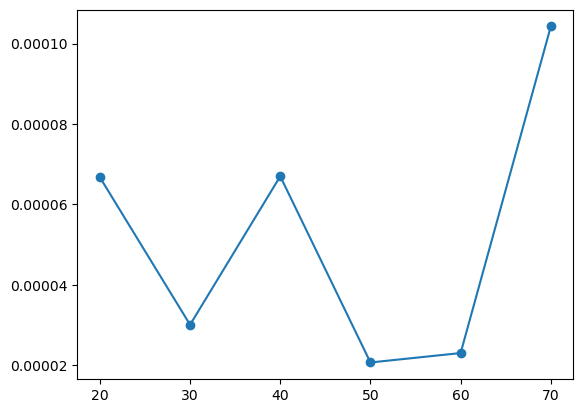

In [22]:
l2_10 = dde.metrics.l2_relative_error(u_exact500, u_10.T)
l2_20 = dde.metrics.l2_relative_error(u_exact500, u_20.T)
l2_30 = dde.metrics.l2_relative_error(u_exact500, u_30.T)
l2_40 = dde.metrics.l2_relative_error(u_exact500, u_40.T)
l2_50 = dde.metrics.l2_relative_error(u_exact500, u_50.T)
l2_60 = dde.metrics.l2_relative_error(u_exact500, u_60.T)
l2_70 = dde.metrics.l2_relative_error(u_exact500, u_70.T)
l2_80 = dde.metrics.l2_relative_error(u_exact500, u_80.T)

plt.scatter([20,30,40,50,60,70],[l2_20,l2_30,l2_40,l2_50,l2_60,l2_70])
plt.plot([20,30,40,50,60,70],[l2_20,l2_30,l2_40,l2_50,l2_60,l2_70])